# **WQD7004 - British Airways Customer Feedback Analysis**


## **0. Requirement**
---

WQD7004 Programming for Data Science (Group Project – 20%)

Your company has received several new projects this month. All these projects are equally important, with a certain level of technical difficulties and challenges. You have been instructed by the CIO to lead a team of 5 members, to handle one of the projects. You have been given 10 weeks to complete the project and prepare a presentation. Wishing all of you best of luck.
Details
1. Choose a specific title for your project and get a dataset related to your project.
2. Based on the dataset selected, perform the following steps:
  * Determine the details about the dataset (e.g. title, year, purpose of dataset, dimension, content, structure, and the summary) by exploring the raw data.
  * Data cleaning: Putting it all together as a new cleaned/processed dataset. Which section of the data do you need to tidy? You can use any cleaning packages in R
  * Data analysis: Identify the questions, what is the objective/goal of processing this dataset? What answers are you interested to find from this dataset? You must have at least two questions. It is best to have different types of problems, i.e. one regression, and one classification.

Requirements
1. Each group must have 5 members.
2. Report and presentation submission in week 13. Late submission will be subjected to mark deductions.
  * Report: Submission will be an R Markdown published at RPubs, and the link is to be submitted in spectrum or any other medium as specified. The R Markdown may include the following:
    * Short introduction and objectives of the project
    * Explanation of all the processes involved in the project.
    * Results, which may include visualization, prediction, evaluation of models and discussion of output.
    * Conclusion
  * Presentation: prepare the presentation (video recording, maximum 12 minutes)
  * Only the group leader is required to submit the report which include the R Markdown link and the presentation link.
3. Marks will be given based on your presentation and report.
4. Plagiarism is strictly PROHIBITED. You will be penalized if any of your work is found online.

## **1. Introduction**
----

**Members**

|**Name**|**Matrix Number**|
|:-:|:-:|
|Ding Lee Choong|23075143|
|Wong Yang Gui|22104322|
|Li Yang Bo|22099073|
|Asadullah Qamar Bhatti|2136569|
|LOW MENG FEI|23063305|


**Introduction**

British Airways (BA), one of the world's leading airlines, has a rich history of providing air travel services to millions of passengers each year. Founded in 1974, the airline has grown to become a major player in the aviation industry, known for its extensive network, quality service, and commitment to passenger comfort and safety. As the airline industry becomes increasingly competitive, maintaining high levels of customer satisfaction is essential for retaining customers and fostering loyalty.

In recent years, the proliferation of digital communication channels has led to an explosion in customer feedback. Passengers now share their experiences through various platforms, including in-flight surveys, online reviews, social media, and direct communications with customer service. This feedback contains valuable insights into passengers' experiences, preferences, and expectations.

Analyzing this feedback effectively allows British Airways to identify strengths and weaknesses in their services, respond to customer needs more efficiently, and make data-driven decisions to enhance overall customer satisfaction. By leveraging data science techniques, the study aims to transform raw customer feedback into actionable insights that can drive strategic improvements and ensure a superior travel experience for its passengers.

**Objectives**
* Discern patterns and unveil insights to gauge overall sentiment and identify common issues related to passenger satisfaction and disatisfaction.
* Use text mining and natural language processing techniques to classify customer sentiments.
* Develop predictive models to estimate customer satisfaction based on various factors, such as flight experience, service quality, and passenger demographics.



## **2. Data Understanding**
---

### **2.1 Introduction**

* **Title:** British Airways customer feedback

* **Year:** The dataset was collected in 2023.

* **Source:** The dataset was extracted from [Airline Quality](https://www.airlinequality.com/) through web scrapping by Anshul Chaudhary & Muskan Risinghani, available on [kaggle](https://www.kaggle.com/datasets/chaudharyanshul/airline-reviews/data).

* **Purpose:** The British Airways customer feedback dataset provide a valuable resource of customer feedback for analysis, spanning from 2010 to 2023. It offers real-time insights, enabling sentiment analysis, service quality assessment, route performance evaluation, aircraft experience analysis and etc. By leveraging this data, British Airways can enhance the overall customer experience, gain a competitive advantage, and make data-driven decisions for targeted improvements.


### **2.2 Dataset Overview**

* **Dimension:** 3,701 Rows & 19 Columns
* **Contents & Structure:**

  **1. Flight Details**
      [Date] DateFlown: Date of the flight.
      [Character] Name: Customer's name who provided the feedback.
      [Nominal] TypeOfTraveller: Traveler type (e.g., Business, Leisure).
      [Nominal] SeatType: Seat class (e.g. Business, Economy).
      [Character] Route: The flight route taken by the customer.
      [Character] Aircraft: Aircraft model.

  **2. Rating Feedback**
      [Nominal] Recommended: Whether the customer recommends British Airways.
      [Ordinal] OverallRating: Overall customer rating.
      [Ordinal] SeatComfort: Seat comfort rating.
      [Ordinal] CabinStaffService: Cabin staff service rating.
      [Ordinal] GroundService: Ground service rating.
      [Ordinal] ValueForMoney: Value for money rating.
      [Ordinal] Food&Beverages: Food & beverages rating.
      [Ordinal] InflightEntertainment: Inflight entertainment rating.
      [Ordinal] Wifi&Connectivity: Onboard wifi and connectivity rating.

  **3. Textual Feedback**
      [Character] ReviewHeader: Title of the customer's review.
      [Character] ReviewBody: Detailed review content.

  **4. Other Details**
      [Date] Datetime: The date when the feedback was posted.
      [Nominal] VerifiedReview: Indicates if the review is verified

In [ ]:
# if(!"pacman" %in% installed.packages()[,"Package"]) install.packages("pacman") # R package management tool
# pacman::p_load(tidyverse) # An integrated package allows for data import, tidying, manipulation (dyplr), visualisation (ggplot2), stringr (text preprocessing) and etc.

# # Import data
# original_df <- read.csv('BA_AirlineReviews.csv',header=TRUE)[-1]

# # Data overview
# glimpse(original_df)

### **2.3 Summary**

In [ ]:
# summary(original_df)

## **3. Data Cleaning**

---
The subsequent stage involves data cleaning, aiming to achieve accuracy, consistency, and readiness for analysis and modelling. This multifaceted process involves three distinct stages: common cleaning, text pre-processing, and text representation. Let's delve into each stage with more detail:



#### **3.1 Common Cleaning**

##### **3.1.1 Data Type Conversion**
Ensuring proper data types for each variable to facilitate analysis.

In [ ]:
# df <- original_df

# # convert date variables into date format
# df$Datetime <- as.Date(df$Datetime, format = "%dth %B %Y")
# df$DateFlown <- as.Date(paste0("1 ", df$DateFlown), format = "%d %B %Y")

# df$VerifiedReview <- as.logical(df$VerifiedReview)

# # convert rating variables into integer format
# df$ValueForMoney  <- as.integer(df$ValueForMoney)
# df$Food.Beverages  <- as.integer(df$Food.Beverages)

# df$InflightEntertainment  <- as.integer(df$InflightEntertainment)
# df$Recommended <- as.integer(factor(df$Recommended, levels = c("no", "yes"), labels = c(0, 1)))

# # ensure that character variable with "" is showing as NA
# df <- mutate_if(df, is.character, na_if, "")

# # encoded the categorical variables
# df$encoded_TypeOfTraveller <- as.integer(factor(df$TypeOfTraveller))
# df$encoded_SeatType <- as.integer(factor(df$SeatType))


In [ ]:
# # Output for checking:
# glimpse(df)

##### **3.1.2 Handling Missing Values**
Identifying and addressing missing data points to maintain data integrity.

In [ ]:
# pacman::p_load(visdat, ggplot2) # Data Visualisation tool

# options(repr.plot.width = 13, repr.plot.height = 8)

# #Check Missing Values
# vis_miss(df,sort_miss=T, cluster = T) + theme(text = element_text(size = 14, face = "bold"), axis.text.x = element_text(angle = 70))

1. **Wifi.Connectivity** has an 84% missing rate, leading to substantial data loss. Imputing such a high percentage of missing values could introduce significant biases and distort the analysis. We decide to drop the variable to maintain the integrity and reliability of the dataset.

In [ ]:
# df_clean1 <- df %>% select(-Wifi.Connectivity,-Aircraft,-Route)

2. For the rating variables **InflightEntertainment**, **GroundService**, **Food.Beverages**, **CabinStaffService**, **SeatComfort**, and **ValueForMoney**, we propose using K-Nearest Neighbors (KNN) imputation. KNN imputation effectively preserves the data structure by filling in missing values based on similarities between observations. This method suits these rating variables well, given their positive correlation with others. They can thus serve as dependable proxies for completing missing values in associated variables.

  For the encoded variables **encoded_SeatType** and **encoded_TypeOfTraveller**, we decided to remove the missing values. This decision is based on the finding that these variables have a low correlation with others, making them less reliable for imputation and potentially less impactful on the overall data analysis.

In [ ]:
# pacman::p_load(reshape2) # For melting the correlation matrix

# options(repr.plot.width = 8, repr.plot.height = 5)

# #  Rating sharing the positive correlation among others
# df_clean1 %>% select(where(is.numeric)) %>% cor(use = "complete.obs") %>% melt() %>% ggplot( aes(x = Var1, y = Var2, fill = value)) + geom_tile() +
#   geom_text(aes(label = sprintf("%.2f", value)), size = 4, color = "black") +
#   scale_fill_gradient2(low = "blue", high = "red", mid = "white", midpoint = 0, limit = c(-1, 1), space = "Lab", name = "Correlation") +
#   theme( text = element_text(size = 14, face="bold"), axis.title = element_blank(), axis.text.x = element_text(angle = 90))

In [ ]:
# df_clean2 <- df_clean1 %>% drop_na("SeatType","TypeOfTraveller")

In [ ]:
# pacman::p_load("VIM","imputeTS","conflicted") # load the necessary pacakges for KNN imputation

# conflicts_prefer(dplyr::filter) # conflicct in dplyr:filter and stats::filter

# # columns for imputation
# feature1 <- c("SeatComfort", "CabinStaffService", "GroundService", "ValueForMoney", "Food.Beverages", "InflightEntertainment","Recommended","OverallRating")

# # apply kNN imputation
# df_imputed <- df_clean2 %>% select(all_of(feature1)) %>% kNN()
# head(df_imputed)

3. The study will focus on rating and review data. Consequently, retaining the remaining missing values for DateFlown and Datetime will not affect the model results. However, these variables will be utilized in the analysis phase to extract potential insights.

In [ ]:
# df_clean3 <- df_clean2

# # update the rows with imputed values
# df_clean3[,feature1] <- df_imputed[,feature1]

# options(repr.plot.width = 13, repr.plot.height = 8)

# #Check Missing Values
# vis_miss(df_clean3,sort_miss=T, cluster = T) + theme(text = element_text(size = 14, face = "bold"), axis.text.x = element_text(angle = 70))

##### **3.1.3 Dealing with Duplicate Entries**
Detecting and removing duplicate records to maintain dataset uniqueness.

In [ ]:
# # show duplicate rows
# nrow(df_clean3[duplicated(df_clean3),])

In [ ]:
# # remove 7 duplicated rows from the dataset
# df_clean4 <- unique(df_clean3)

# print("Before cleaning")
# print(paste0("Rows: ",nrow(original_df),", Columns: ", ncol(original_df)))
# print("After cleaning")
# print(paste0("Rows: ",nrow(df_clean3),", Columns: ", ncol(df_clean3)))

##### **3.1.4 Handling Outliers**
Frequency analysis has been utilized to identify outliers in ordinal data. The analysis did not show significant evidence that less frequent levels should be considered as outliers.

In [ ]:
# options(repr.plot.width = 20, repr.plot.height = 7)

# df_clean4 %>%
#   select(where(is.numeric)) %>%
#   pivot_longer(cols = everything(), names_to = "key", values_to = "value") %>%
#   ggplot(aes(x = value, fill = factor(value))) +
#   facet_wrap(~ key, scales = "free") +
#   geom_bar() +
#   theme_minimal() +
#   theme( text = element_text(size=12,face = "bold")) +
#   scale_fill_brewer(palette = "Paired") +
#   guides(fill = "none")

In [ ]:
# df_final = df_clean4 %>% mutate(row=row_number())
# glimpse(df_final)


### **3.2 Text Pre-processing**

#### **3.2.1 Noise Removal / Normalization / Stop Words Removal**
1. Removing unwanted or irrelevant data from a dataset, such as: punctuations, special characters, duplicate text, html tags, urls, headers, and footers.

2. converting all text to lower case to ensure all in standard format.

3. Discarding commonly used words that do not carry much significance in a given context, such as "and", "the", or "is".

In [ ]:
# pacman::p_load(tm) # tm package for cleaning text

# # define a text cleaning function
# cleaning_text <- function(text){
#   text <- tolower(text) # convert to lower case
#   text <- removePunctuation(text) # remove punctuations
#   text <- removeNumbers(text) # remove numbers
#   text <- removeWords(text,stopwords("en")) # stop word removal
#   text <- gsub("[^a-z ]","",text) # to remove non-lowercase letters and spaces
#   text <- stripWhitespace(text) # ensure no excessive spaces
#   return(text)
# }

# # perform  cleaning on review header
# df_head <- df_final %>% select(row,ReviewHeader) %>% mutate(clean_head = sapply(ReviewHeader, cleaning_text)) %>% as.data.frame()
# head(df_head,3)

# df_body <- df_final %>% select(row,ReviewBody) %>% mutate(clean_body = sapply(ReviewBody, cleaning_text)) %>% as.data.frame()
# head(df_body,3)


#### **3.2.3 Lemmatization**
lemmatization reduces words to thier base form, but it considers the context and morphological analysis. For instance, "better" would be lemmatized to "good" instead of "bet" as in stemming.

In [ ]:
# pacman::p_load(textstem) # packages
# # Function to lemmatize sentences
# lemmatize_sentence <- function(sentence) {
#   # Tokenize the sentence into words
#   words <- unlist(strsplit(sentence, " "))
#   # Lemmatize each word
#   lemmatized_words <- lemmatize_words(words)
#   # Reconstruct the sentence
#   lemmatized_sentence <- paste(lemmatized_words, collapse = " ")
#   return(lemmatized_sentence)
# }
# # lemmatization for head
# df_head$norm_head <- sapply(df_head$clean_head, lemmatize_sentence)
# head(df_head[df_head$norm_head != df_head$clean_head,c('clean_head','norm_head')],3)
# # lemmatization for body
# df_body$norm_body <- sapply(df_body$clean_body, lemmatize_sentence)
# head(df_body[df_body$norm_body != df_body$clean_body,c('clean_body','norm_body')],3)


#### **3.2.2 Tokenization**
Breaking the text into individual words.

In [ ]:
# pacman::p_load(tidytext, dplyr)

# # tokenzied each word for head
# head_token <- df_head %>% select(row, norm_head) %>% unnest_tokens(word, norm_head)
# head(head_token,3)

# # tokenzied each word for body
# body_token <- df_body %>% select(row, norm_body) %>% unnest_tokens(word, norm_body)
# head(body_token,3)

### **3.3 Text Representation**


Sentiment analysis has evolved through lexicon-based and model-based approaches. Initially, lexicon-based analysis was introduced to assign sentiment scores, often categorized as positive, negative, or neutral, to text. Subsequently, this data was transformed into a format suitable for machine learning training and testing purposes.

#### **3.3.1 Lexicon-Based Sentiment Analysis**
Lexicon-based sentiment analysis is a method used to determine the sentiment or emotional tone of a piece of text by leveraging a pre-defined list of words (a lexicon) where each word is associated with a specific sentiment value. This approach relies on dictionaries of words annotated with sentiment scores, typically indicating whether a word is positive, negative, or neutral.

In [ ]:
# pacman::p_load(tidytext,textdata,tidytext,janeaustenr,dplyr,stringr)

# head_token2 <- head_token %>%  left_join(get_sentiments("bing"), by = "word") %>%  mutate(sentiment = ifelse(is.na(sentiment), "neutral", sentiment)) %>% mutate(score = ifelse(sentiment=="neutral",0,ifelse(sentiment=="negative",-1,1)))
# head(head_token2)

# body_token2 <- body_token %>%  left_join(get_sentiments("bing"), by = "word")  %>%  mutate(sentiment = ifelse(is.na(sentiment), "neutral", sentiment)) %>% mutate(score = ifelse(sentiment=="neutral",0,ifelse(sentiment=="negative",-1,1)))
# head(body_token2)


In [ ]:
# # obtain overall sentiment for review head
# overall_head = head_token2 %>% select(row) %>% distinct()
# positive = head_token2 %>% filter(sentiment=="positive") %>% group_by(row) %>% summarise(positive_cnt=n())
# negative = head_token2 %>% filter(sentiment=="negative") %>% group_by(row) %>% summarise(negative_cnt=n())
# neutral = head_token2 %>% filter(sentiment=="neutral") %>% group_by(row) %>% summarise(neutral_cnt=n())
# total = head_token2 %>% group_by(row) %>% summarise(ttl_cnt=n())

# overall_head = overall_head %>% left_join(positive,by = "row") %>% left_join(negative,by = "row") %>% left_join(neutral,by = "row") %>% left_join(total,by = "row")

# overall_head[is.na(overall_head)] <- 0

# overall_head = overall_head %>% mutate(overall_sentiment_score_head = round((positive_cnt*(1) + negative_cnt * (-1) + neutral_cnt * (0)) / ttl_cnt , digits = 2 )) %>% mutate(row=as.integer(row))
# head(overall_head)

# options(repr.plot.width = 10, repr.plot.height = 7)
# hist(overall_head$overall_sentiment_score_head)

In [ ]:
# # obtain overall sentiment for review body
# overall_body = body_token2 %>% select(row) %>% distinct()
# positive = body_token2 %>% filter(sentiment=="positive") %>% group_by(row) %>% summarise(positive_cnt=n())
# negative = body_token2 %>% filter(sentiment=="negative") %>% group_by(row) %>% summarise(negative_cnt=n())
# neutral = body_token2 %>% filter(sentiment=="neutral") %>% group_by(row) %>% summarise(neutral_cnt=n())
# total = body_token2 %>% group_by(row) %>% summarise(ttl_cnt=n())

# overall_body = overall_body %>% left_join(positive,by = "row") %>% left_join(negative,by = "row") %>% left_join(neutral,by = "row") %>% left_join(total,by = "row")

# overall_body[is.na(overall_body)] <- 0

# overall_body = overall_body %>% mutate(overall_sentiment_score_body = round((positive_cnt*(1) + negative_cnt * (-1) + neutral_cnt * (0)) / ttl_cnt , digits = 2 )) %>% mutate(row=as.integer(row))
# head(overall_body)
# options(repr.plot.width = 10, repr.plot.height = 7)
# hist(overall_body$overall_sentiment_score_body)


In [ ]:
# overall_sentiment =  overall_body %>% select(row,overall_sentiment_score_body) %>% left_join(select(overall_head,row,overall_sentiment_score_head),by = 'row') %>%
#   mutate(overall_sentiment_score = round((overall_sentiment_score_head + overall_sentiment_score_body ) / 2, digits = 2)) %>%
#   mutate(overall_sentiment_class = ifelse(overall_sentiment_score < -0.05, "negative",ifelse(overall_sentiment_score > 0.05,"positive","neutral"))) %>%
#   mutate(encoded_overll_sentiment_class = ifelse(overall_sentiment_class=="negative",-1,ifelse(overall_sentiment_class=="positive",1,0)))
# head(overall_sentiment)

# overall_sentiment %>% count(overall_sentiment_class)

# options(repr.plot.width = 10, repr.plot.height = 7)

# ggplot(overall_sentiment, aes(x = overall_sentiment_score, fill = overall_sentiment_class)) +
#   geom_histogram(binwidth = 0.1, alpha = 0.7, position = "identity", color = "black") + # Added black border for better visibility
#   scale_fill_manual(values = c("positive" = "green", "negative" = "red", "neutral" = "yellow")) +
#   labs(title = "Histogram of Overall Sentiment Scores", x = "Overall Sentiment Score", y = "Count") +
#   theme_minimal()


In [ ]:
# final_df = df_final %>% left_join(select(overall_sentiment,row,overall_sentiment_score_body,overall_sentiment_score_head,overall_sentiment_score,overall_sentiment_class, encoded_overll_sentiment_class),by = 'row')
# glimpse(final_df)


In [ ]:
# pacman::p_load(reshape2) # For melting the correlation matrix

# options(repr.plot.width = 10, repr.plot.height = 8)

# #  Rating sharing the positive correlation among others
# final_df %>% select(-row,-encoded_SeatType,-encoded_TypeOfTraveller) %>% select(where(is.numeric)) %>% cor(use = "complete.obs") %>% melt() %>% ggplot( aes(x = Var1, y = Var2, fill = value)) + geom_tile() +
#   geom_text(aes(label = sprintf("%.2f", value)), size = 4, color = "black") +
#   scale_fill_gradient2(low = "blue", high = "red", mid = "white", midpoint = 0, limit = c(-1, 1), space = "Lab", name = "Correlation") +
#   theme( text = element_text(size = 14, face="bold"), axis.title = element_blank(), axis.text.x = element_text(angle = 90))

#### **3.3.2 Text Visualisation**
Visualizing text data can help identify instances of misclassification in text cleaning and representation.  This process allows us to examine and understand the patterns of misclassification more effectively. Additionally, visualizing the distribution of sentiment scores or probabilities for each class can provide further insights into the model's performance and potential areas for improvement.

In [ ]:
# pacman::p_load(tidytext, dplyr, janeaustenr, wordcloud, RColorBrewer, viridis)

# options(repr.plot.width = 10, repr.plot.height = 7)

# # count the frequency word in different sentiment
# analyse1 <- head_token2  %>% count(word, sentiment) %>% arrange(desc(n)) %>% filter(!word %in% c("airway","british","customer","review")) %>%
#   spread(key = sentiment, value = n, fill = 0)

# # Set the row names to the words
# rownames(analyse1) <- analyse1$word
# analyse1 <- analyse1 %>% select(-word) %>% as.matrix

# # Generate the comparison cloud
# comparison.cloud(analyse1, random.order = FALSE, max.words = 250, colors = c("#971B2F", "#F0B323", "#509E2F"), c(2,0.8), title.size = 1.5)
# title("Word Cloud Analysis - Head Review", line = 1, cex.main = 1.5)


In [ ]:
# pacman::p_load(tidytext, dplyr, janeaustenr, wordcloud, RColorBrewer, viridis)

# options(repr.plot.width = 10, repr.plot.height = 7)

# # count the frequency word in different sentiment
# analyse2 <- body_token2  %>% count(word, sentiment) %>% arrange(desc(n)) %>% filter(!word %in% c("airway","british","customer","review")) %>%
#   spread(key = sentiment, value = n, fill = 0)

# # Set the row names to the words
# rownames(analyse2) <- analyse2$word
# analyse2 <- analyse2 %>% select(-word) %>% as.matrix

# # Generate the comparison cloud
# comparison.cloud(analyse2, random.order = FALSE, max.words = 250, color = c("#971B2F", "#F0B323", "#509E2F"), c(2,0.8), title.size = 1.5)
# title("Word Cloud Analysis - Body Review", line = 1, cex.main = 1.5)


### **3.4 Summary**
To summarize the data for analyse and model

In [ ]:
# # final clean data for analyse and modeling
# glimpse(final_df)

# write.csv(final_df, file = "final_df.csv", row.names=FALSE)

# # final text data for text analysis (eda part only)
# final_text <- bind_rows(head_token2 %>% mutate(source = "head"), body_token2 %>% mutate(source = "body"))

# glimpse(final_text)

# write.csv(final_text, file = "final_text.csv", row.names=FALSE)


In [ ]:
if(!"pacman" %in% installed.packages()[,"Package"]) install.packages("pacman") # R package management tool
pacman::p_load(tidyverse)

# final clean data for analyse and modeling
final_df <- read.csv('final_df.csv',header=TRUE)

final_df$Datetime <- as.Date(final_df$Datetime)
final_df$DateFlown <- as.Date(final_df$DateFlown)

glimpse(final_df)

# final clean data for analyse and modeling
final_text <- read.csv('final_text.csv',header=TRUE)
glimpse(final_text)

Rows: 2,929
Columns: 24
$ OverallRating                  <int> 1, 3, 8, 1, 1, 1, 8, 7, 2, 3, 8, 1, 6, …
$ ReviewHeader                   <chr> "\"Service level far worse then Ryanair…
$ Name                           <chr> "L Keele", "Austin Jones", "M A Collie"…
$ Datetime                       <date> 2023-11-19, 2023-11-19, 2023-11-16, 20…
$ VerifiedReview                 <lgl> TRUE, TRUE, FALSE, TRUE, FALSE, TRUE, T…
$ ReviewBody                     <chr> "4 Hours before takeoff we received a M…
$ TypeOfTraveller                <chr> "Couple Leisure", "Business", "Couple L…
$ SeatType                       <chr> "Economy Class", "Economy Class", "Busi…
$ DateFlown                      <date> 2023-11-01, 2023-11-01, 2023-11-01, 20…
$ SeatComfort                    <int> 1, 2, 3, 3, 1, 1, 5, 3, 4, 3, 3, 3, 3, …
$ CabinStaffService              <int> 1, 3, 3, 3, 1, 1, 5, 3, 5, 3, 3, 3, 1, …
$ GroundService                  <int> 1, 1, 4, 1, 1, 1, 4, 3, 3, 3, 4, 1, 3, …
$ ValueForMoney 

## **4. Data Analysis**


---


* The primary objective of this data analysis is to explore patterns and trends within the airline review dataset to gain valuable insights into customer sentiments. By conducting a thorough exploratory data analysis (EDA), we aim to uncover significant relationships, understand underlying sentiments, and identify any anomalies present in the data. Through various visualizations and statistical techniques, we strive to provide a comprehensive understanding of customer opinions and experiences, aiding in informed decision-making and strategic planning for the airline industry.

### 4.2 Data Visualization

In [ ]:
# library(pacman)
# pacman::p_load(lubridate, ggplot2,cowplot)

# # calculate average rating by month-year
# graph1 <- final_df %>%
#   mutate(Datetime = floor_date(Datetime, "month")) %>%
#   group_by(Datetime) %>%
#   summarise(across(where(is.numeric), mean, na.rm = TRUE), cnt=n()) %>%
#   arrange(Datetime)

# # convert to readable format for ggplot2
# graph_long <- graph1 %>%
#   pivot_longer(cols = c(-cnt,-Datetime,-encoded_overll_sentiment_class,-encoded_SeatType,-encoded_TypeOfTraveller,-overall_sentiment_score,-overall_sentiment_score_body ,-row,-overall_sentiment_score_head,-Recommended), , names_to = "variable", values_to = "average")

# # generate the graph

# options(repr.plot.width = 20, repr.plot.height = 6)
# # Create line plot
# line_plot = ggplot(graph_long, aes(x = Datetime, y = average, color = variable)) +
#   geom_line() +
#   labs(x = "Year", y = "Average Rating", title = "Average Rating by Month Over Date Time") +
#   theme_minimal() +
#   theme(text = element_text(size = 15), plot.title = element_text(hjust = 0.5))

# # Create bar plot for count
# bar_plot <- ggplot(graph1, aes(x = Datetime, y = cnt)) +
#   geom_bar(stat = "identity", fill = "blue", alpha = 0.5) +
#   labs(x = "Year", y = "Count", title = "Counts of Flights by Month Over Date Time") +
#   theme_minimal() +
#   theme(text = element_text(size = 15), plot.title = element_text(hjust = 0.5))

# # Combine plots
# combo_chart <- plot_grid(line_plot, bar_plot, nrow = 2, align = "v")

# # Print the combo chart
# print(combo_chart)

In [ ]:
# library(pacman)
# pacman::p_load(lubridate, ggplot2,cowplot)

# # calculate average rating by month-year
# graph1 <- final_df %>%
#   mutate(Datetime = floor_date(DateFlown, "month")) %>%
#   group_by(Datetime) %>%
#   summarise(across(where(is.numeric), mean, na.rm = TRUE), cnt=n()) %>%
#   arrange(Datetime)

# # convert to readable format for ggplot2
# graph_long <- graph1 %>%
#   pivot_longer(cols = c(-cnt,-Datetime,-encoded_overll_sentiment_class,-encoded_SeatType,-encoded_TypeOfTraveller,-overall_sentiment_score,-overall_sentiment_score_body ,-row,-overall_sentiment_score_head,-Recommended), , names_to = "variable", values_to = "average")

# # generate the graph

# options(repr.plot.width = 20, repr.plot.height = 6)
# # Create line plot
# line_plot = ggplot(graph_long, aes(x = Datetime, y = average, color = variable)) +
#   geom_line() +
#   labs(x = "Year", y = "Average Rating", title = "Average Rating by Month Over Date Flown") +
#   theme_minimal() +
#   theme(text = element_text(size = 15), plot.title = element_text(hjust = 0.5))

# # Create bar plot for count
# bar_plot <- ggplot(graph1, aes(x = Datetime, y = cnt)) +
#   geom_bar(stat = "identity", fill = "blue", alpha = 0.5) +
#   labs(x = "Year", y = "Count", title = "Counts of Flights by Month Over Date Flown") +
#   theme_minimal() +
#   theme(text = element_text(size = 15), plot.title = element_text(hjust = 0.5))

# # Combine plots
# combo_chart <- plot_grid(line_plot, bar_plot, nrow = 2, align = "v")

# # Print the combo chart
# print(combo_chart)

Comprehensive analysis
Relationship between ratings and number of flights:\
While the counts of flights dropped sharply in the early 2020s, the ratings (especially the overall ratings) showed large fluctuations. This may be due to a reduction in passenger numbers during the pandemic, leading to more significant changes in individual ratings.
As the number of flights recovered in 2021 and beyond, the fluctuations in the ratings decreased, but they still have not returned to the stable levels seen before the pandemic.

Relationship between rating categories:
OverallRating is significantly higher than the other categories, indicating higher overall passenger satisfaction, while ratings for specific services (e.g., Cabin Staff Service, Food & Beverages, etc.) are relatively low and not very different from each other.

By combining these two charts, it is possible to better understand the changes in passenger ratings of airline services over time and the relationship between these changes and the number of flights

In [ ]:
# pacman::p_load(tidytext, dplyr, janeaustenr, wordcloud, RColorBrewer, viridis)

# options(repr.plot.width = 17, repr.plot.height = 6)

# # count the frequency word in different sentiment
# analyse1 <- final_text %>% left_join(select(final_df,row,Recommended), by = "row") %>% count(word, Recommended) %>% arrange(desc(n)) %>% filter(!word %in% c("airway","british","customer","review")) %>%
#   spread(key = Recommended, value = n, fill = 0)

# # Set the row names to the words
# rownames(analyse1) <- analyse1$word
# analyse1 <- analyse1 %>% select(-word) %>% as.matrix

# # set the layout
# layout(mat = matrix(c(1,2), nrow=1, ncol=2) ,
#        heights = c(2), # Heights of the two rows
#        widths = c(1, 1)) # Widths of the two columns

# # Word CLoud Graph
# comparison.cloud(analyse1, random.order = FALSE, max.words = 100, c(3,0.5), title.size = 1.1)
# title("Word Cloud Analysis - Head Review", line = 1, cex.main = 1.5)

# sentiment_counts <- final_df %>%
#   group_by(Recommended) %>%
#   summarise(total = n()) %>%
#   ungroup()

# # Plot a pie chart
# pie(sentiment_counts$total, labels = sentiment_counts$Recommended,
#     col = c("#509E2F", "#F0B323", "#971B2F"),
#     main = "Distribution of Recommended Sentiment")


This Word Cloud Map allows you to visualise the words most frequently mentioned by passengers in their reviews and the frequency of these words in different recommendation categories. The word cloud helps to identify keywords in both positive and negative reviews, which in turn provides insights into passengers' specific opinions and feedback about the airline.

In [ ]:
# pacman::p_load(tidytext, dplyr, janeaustenr, wordcloud, RColorBrewer, viridis)

# options(repr.plot.width = 12, repr.plot.height = 9)

# # count the frequency word in different sentiment
# analyse1 <- final_text %>% left_join(select(final_df,row,VerifiedReview), by = "row") %>% count(word, VerifiedReview) %>% arrange(desc(n)) %>% filter(!word %in% c("airway","british","customer","review")) %>%
#   spread(key = VerifiedReview, value = n, fill = 0)

# # Set the row names to the words
# rownames(analyse1) <- analyse1$word
# analyse1 <- analyse1 %>% select(-word) %>% as.matrix

# par(mfrow=c(1,2))
# comparison.cloud(analyse1, random.order = FALSE, max.words = 250, c(2,0.8), title.size = 1.1)
# title("Word Cloud Analysis - Head Review", line = 1, cex.main = 1.5)

# sentiment_counts <- final_df %>%
#   group_by(VerifiedReview) %>%
#   summarise(total=n()) %>%
#   ungroup()


# # Plot a pie chart
# pie(sentiment_counts$total, labels = sentiment_counts$VerifiedReview,
#     col = c("#509E2F", "#F0B323", "#971B2F"),
#     main = "Distribution of VerifiedReview Sentiment")



The combination of the word cloud map and the pie chart allows us to draw the following conclusions:
The most frequently mentioned words in the reviews are related to passengers' flight experience and service.
Most of the words mentioned in the reviews tend to be negative, e.g. ‘delay’, ‘cancel’, ‘refund’, etc., which is in line with the high percentage of non-recommended reviews shown in the pie chart.
Some positive terms, such as ‘comfortable’, ‘good’, are also present but relatively few, suggesting that while some passengers are satisfied with the airline service, the overall proportion of non-recommendations is high.
This visual analysis helps us to better understand passenger feedback and issues in airline services

In [ ]:
# pacman::p_load(tidytext, dplyr, janeaustenr, wordcloud, RColorBrewer, viridis)

# options(repr.plot.width = 12, repr.plot.height = 9)

# # count the frequency word in different sentiment
# analyse1 <- final_text %>% left_join(select(final_df,row,TypeOfTraveller), by = "row") %>% count(word, TypeOfTraveller) %>% arrange(desc(n)) %>% filter(!word %in% c("airway","british","customer","review")) %>%
#   spread(key = TypeOfTraveller, value = n, fill = 0)

# # Set the row names to the words
# rownames(analyse1) <- analyse1$word
# analyse1 <- analyse1 %>% select(-word) %>% as.matrix

# par(mfrow=c(1,2))
# comparison.cloud(analyse1, random.order = FALSE, max.words = 250, c(2,0.8), title.size = 1.1)
# title("Word Cloud Analysis - Head Review", line = 1, cex.main = 1.5)

# sentiment_counts <- final_df %>%
#   group_by(TypeOfTraveller) %>%
#   summarise(total=n()) %>%
#   ungroup()


# # Plot a pie chart
# pie(sentiment_counts$total, labels = sentiment_counts$TypeOfTraveller,
#     col = c("#509E2F", "#F0B323", "#971B2F"),
#     main = "Distribution of TypeOfTraveller Sentiment")

In [ ]:
# pacman::p_load(tidytext, dplyr, janeaustenr, wordcloud, RColorBrewer, viridis)

# options(repr.plot.width = 12, repr.plot.height = 9)

# # count the frequency word in different sentiment
# analyse1 <- final_text %>% left_join(select(final_df,row,SeatType), by = "row") %>% count(word, SeatType) %>% arrange(desc(n)) %>% filter(!word %in% c("airway","british","customer","review")) %>%
#   spread(key = SeatType, value = n, fill = 0)

# # Set the row names to the words
# rownames(analyse1) <- analyse1$word
# analyse1 <- analyse1 %>% select(-word) %>% as.matrix

# par(mfrow=c(1,2))
# comparison.cloud(analyse1, random.order = FALSE, max.words = 250, c(2,0.8), title.size = 1.1)
# title("Word Cloud Analysis - Head Review", line = 1, cex.main = 1.5)

# sentiment_counts <- final_df %>%
#   group_by(SeatType) %>%
#   summarise(total=n()) %>%
#   ungroup()


# # Plot a pie chart
# pie(sentiment_counts$total, labels = sentiment_counts$SeatType,
#     col = c("#509E2F", "#F0B323", "#971B2F"),
#     main = "Distribution of SeatType Sentiment")

## **5. Modelling & Evaluation**


---


### **5.1 Classification**

* Purpose: To determine if a given flight plan (SeatType, TypeOfTraveler, CabinStaffRating, GroundServiceRating) will be satisfactory, unsatisfactory or neutral sentiment score. The flight planners can hence take actions to tweak the flight plan such that it will give a satisfactory experience for the passengers.
* Model: Logistic Regression, Support Vector Machines (SVM), Naive Bayes, KNN, Decision Tree, and Random Forest

* Training: 0.7train/0.3test

* Evaluation: accuracy and f1


In [ ]:
glimpse(final_df)

Rows: 2,929
Columns: 24
$ OverallRating                  <int> 1, 3, 8, 1, 1, 1, 8, 7, 2, 3, 8, 1, 6, …
$ ReviewHeader                   <chr> "\"Service level far worse then Ryanair…
$ Name                           <chr> "L Keele", "Austin Jones", "M A Collie"…
$ Datetime                       <date> 2023-11-19, 2023-11-19, 2023-11-16, 20…
$ VerifiedReview                 <lgl> TRUE, TRUE, FALSE, TRUE, FALSE, TRUE, T…
$ ReviewBody                     <chr> "4 Hours before takeoff we received a M…
$ TypeOfTraveller                <chr> "Couple Leisure", "Business", "Couple L…
$ SeatType                       <chr> "Economy Class", "Economy Class", "Busi…
$ DateFlown                      <date> 2023-11-01, 2023-11-01, 2023-11-01, 20…
$ SeatComfort                    <int> 1, 2, 3, 3, 1, 1, 5, 3, 4, 3, 3, 3, 3, …
$ CabinStaffService              <int> 1, 3, 3, 3, 1, 1, 5, 3, 5, 3, 3, 3, 1, …
$ GroundService                  <int> 1, 1, 4, 1, 1, 1, 4, 3, 3, 3, 4, 1, 3, …
$ ValueForMoney 

#### 5.1.1 Final Data Preparation for Modelling

In [ ]:
# Load required libraries
if (!requireNamespace("dplyr", quietly = TRUE)) install.packages("dplyr")

library(dplyr)

# Assuming final_df is already defined and loaded
final_df_selected <- dplyr::select(final_df, SeatType, TypeOfTraveller, CabinStaffService, GroundService, overall_sentiment_class, overall_sentiment_score)

# Check the selected data frame
print(head(final_df_selected))


        SeatType TypeOfTraveller CabinStaffService GroundService
1  Economy Class  Couple Leisure                 1             1
2  Economy Class        Business                 3             1
3 Business Class  Couple Leisure                 3             4
4  Economy Class  Couple Leisure                 3             1
5  Economy Class  Couple Leisure                 1             1
6  Economy Class    Solo Leisure                 1             1
  overall_sentiment_class overall_sentiment_score
1                negative                   -0.14
2                 neutral                   -0.03
3                positive                    0.18
4                negative                   -0.17
5                 neutral                   -0.02
6                negative                   -0.21


In [ ]:
# prompt: Convert CabinStaffService and GroundService to numeric

final_df_selected <- final_df_selected %>% mutate(CabinStaffService = as.numeric(CabinStaffService), GroundService = as.numeric(GroundService))


In [ ]:
# Inputs and label
head(final_df_selected)

,SeatType,TypeOfTraveller,CabinStaffService,GroundService,overall_sentiment_class,overall_sentiment_score
,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
1,Economy Class,Couple Leisure,1,1,negative,-0.14
2,Economy Class,Business,3,1,neutral,-0.03
3,Business Class,Couple Leisure,3,4,positive,0.18
4,Economy Class,Couple Leisure,3,1,negative,-0.17
5,Economy Class,Couple Leisure,1,1,neutral,-0.02
6,Economy Class,Solo Leisure,1,1,negative,-0.21


In [ ]:
# install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘parallelly’, ‘future’, ‘future.apply’, ‘lava’, ‘prodlim’, ‘clock’, ‘ipred’, ‘recipes’




In [ ]:
library(caret)

# Assume final_df_selected is already defined and loaded

# Create a dummy variable model for SeatType and TypeOfTraveller
dummies <- dummyVars(~ SeatType + TypeOfTraveller, data = final_df_selected)

# Apply the dummy variable model to the data and convert to a data frame
encoded_df <- as.data.frame(predict(dummies, newdata = final_df_selected))

# Combine the one-hot encoded columns back with the original columns that were not part of the encoding
non_encoded_columns <- final_df_selected[, !(colnames(final_df_selected) %in% c("SeatType", "TypeOfTraveller"))]
final_df_selected <- cbind(non_encoded_columns, encoded_df)

# Check the structure to confirm all columns are present
str(final_df_selected)


Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




'data.frame':	2929 obs. of  12 variables:
 $ CabinStaffService            : num  1 3 3 3 1 1 5 3 5 3 ...
 $ GroundService                : num  1 1 4 1 1 1 4 3 3 3 ...
 $ overall_sentiment_class      : chr  "negative" "neutral" "positive" "negative" ...
 $ overall_sentiment_score      : num  -0.14 -0.03 0.18 -0.17 -0.02 -0.21 0.12 0.25 -0.36 0 ...
 $ SeatTypeBusiness Class       : num  0 0 1 0 0 0 0 0 0 0 ...
 $ SeatTypeEconomy Class        : num  1 1 0 1 1 1 0 1 1 1 ...
 $ SeatTypeFirst Class          : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SeatTypePremium Economy      : num  0 0 0 0 0 0 1 0 0 0 ...
 $ TypeOfTravellerBusiness      : num  0 1 0 0 0 0 0 0 0 0 ...
 $ TypeOfTravellerCouple Leisure: num  1 0 1 1 1 0 1 0 0 1 ...
 $ TypeOfTravellerFamily Leisure: num  0 0 0 0 0 0 0 0 1 0 ...
 $ TypeOfTravellerSolo Leisure  : num  0 0 0 0 0 1 0 1 0 0 ...


In [ ]:
# prompt: Normalising the scale of all the features except sentiment class

# Normalise the scale of all the features except sentiment class
features <- names(final_df_selected)[!names(final_df_selected) %in% "overall_sentiment_class"]
final_df_selected[features] <- scale(final_df_selected[features])


#### 5.1.2 Train Test Split with Stratification
To ensure balanced classes in train and test sets.

In [ ]:
# Train Test Split, stratified by target_variable
# Load required libraries
if (!requireNamespace("caret", quietly = TRUE)) install.packages("caret")
library(caret)

# Define the target column
target_column <- "overall_sentiment_class"  # Replace with the actual name of your target column if different

# Perform a stratified train-test split
set.seed(123)
trainIndex <- createDataPartition(final_df_selected[[target_column]], p = .7,
                                  list = FALSE,
                                  times = 1)

# Create training and testing sets
train_set <- final_df_selected[trainIndex, ]
test_set <- final_df_selected[-trainIndex, ]

# Separate features and target
X_train <- train_set[, !(colnames(train_set) %in% c(target_column,"overall_sentiment_score"))]
y_train <- train_set[[target_column]]
X_test <- test_set[, !(colnames(test_set) %in% c(target_column,"overall_sentiment_score"))]
y_test <- test_set[[target_column]]

In [ ]:
# Install required packages
# install.packages("DMwR2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘TTR’, ‘xts’, ‘zoo’, ‘quantmod’


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



#### 5.1.3 Preliminary Set of Algorithms
The initial set of algorithms are Naive Bayes, Decision Tree, SVM, and Random Forest.

In [ ]:
# Load required libraries

pacman::p_load(nnet,naivebayes,e1071,rpart,randomForest,MLmetrics, caret)

# Function to clean column names to ensure they are valid R variable names
clean_names <- function(df) {
  colnames(df) <- make.names(colnames(df), unique = TRUE)
  return(df)
}

# Assuming X_train, y_train, X_test, and y_test are already defined and loaded
X_train <- clean_names(X_train)
X_test <- clean_names(X_test)

# Ensure y_train and y_test are factors for classification tasks
y_train <- as.factor(y_train)
y_test <- as.factor(y_test)

# Set seed for reproducibility
set.seed(123)

# Initialize a list to store models and their evaluation metrics
models <- list()
evaluation <- data.frame(Model = character(), Accuracy = numeric(), F1 = numeric(), stringsAsFactors = FALSE)

# Multinomial Logistic Regression
multinom_model <- multinom(y_train ~ ., data = data.frame(X_train, y_train))
pred_multinom <- predict(multinom_model, X_test)
acc_multinom <- sum(pred_multinom == y_test) / length(y_test)
f1_multinom <- F1_Score(y_true = y_test, y_pred = pred_multinom, positive = levels(y_test)[1])
models$multinom <- multinom_model
evaluation <- rbind(evaluation, data.frame(Model = "Multinomial Logistic Regression", Accuracy = acc_multinom, F1 = f1_multinom))

# Support Vector Machines (SVM)
svm_model <- svm(y_train ~ ., data = data.frame(X_train, y_train), kernel = "linear", probability = TRUE)
pred_svm <- predict(svm_model, X_test)
acc_svm <- sum(pred_svm == y_test) / length(y_test)
f1_svm <- F1_Score(y_true = y_test, y_pred = pred_svm, positive = levels(y_test)[1])
models$svm <- svm_model
evaluation <- rbind(evaluation, data.frame(Model = "SVM", Accuracy = acc_svm, F1 = f1_svm))

# Naive Bayes
nb_model <- naive_bayes(y_train ~ ., data = data.frame(X_train, y_train))
pred_nb <- predict(nb_model, X_test)
acc_nb <- sum(pred_nb == y_test) / length(y_test)
f1_nb <- F1_Score(y_true = y_test, y_pred = pred_nb, positive = levels(y_test)[1])
models$nb <- nb_model
evaluation <- rbind(evaluation, data.frame(Model = "Naive Bayes", Accuracy = acc_nb, F1 = f1_nb))

# K-Nearest Neighbors (KNN)
knn_model <- train(y_train ~ ., data = data.frame(X_train, y_train), method = "knn", tuneLength = 5)
pred_knn <- predict(knn_model, X_test)
acc_knn <- sum(pred_knn == y_test) / length(y_test)
f1_knn <- F1_Score(y_true = y_test, y_pred = pred_knn, positive = levels(y_test)[1])
models$knn <- knn_model
evaluation <- rbind(evaluation, data.frame(Model = "KNN", Accuracy = acc_knn, F1 = f1_knn))

# Decision Tree
dt_model <- rpart(y_train ~ ., data = data.frame(X_train, y_train))
pred_dt <- predict(dt_model, X_test, type = "class")
acc_dt <- sum(pred_dt == y_test) / length(y_test)
f1_dt <- F1_Score(y_true = y_test, y_pred = pred_dt, positive = levels(y_test)[1])
models$dt <- dt_model
evaluation <- rbind(evaluation, data.frame(Model = "Decision Tree", Accuracy = acc_dt, F1 = f1_dt))

# Random Forest
rf_model <- randomForest(y_train ~ ., data = data.frame(X_train, y_train), ntree = 100)
pred_rf <- predict(rf_model, X_test)
acc_rf <- sum(pred_rf == y_test) / length(y_test)
f1_rf <- F1_Score(y_true = y_test, y_pred = pred_rf, positive = levels(y_test)[1])
models$rf <- rf_model
evaluation <- rbind(evaluation, data.frame(Model = "Random Forest", Accuracy = acc_rf, F1 = f1_rf))

# Print evaluation results
print(evaluation)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


naivebayes installed

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


randomForest installed

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘gtools’, ‘caTools’, ‘gplots’, ‘ROCR’



MLmetrics installed



# weights:  36 (22 variable)
initial  value 2254.352416 
iter  10 value 1981.437032
iter  20 value 1959.520376
final  value 1956.793479 
converged
                            Model  Accuracy        F1
1 Multinomial Logistic Regression 0.5324971 0.3981693
2                             SVM 0.5017104 0.1025641
3                     Naive Bayes 0.5062714 0.4517375
4                             KNN 0.5313569 0.4128257
5                   Decision Tree 0.5108324       NaN
6                   Random Forest 0.5199544 0.3861171


The best model from the preliminary modelling is Naive Bayes which is only able to accomplish accuracy and F1 of 51%. Since this is as good as a coin flip, this is definitely not good enough, so we will try to remedy by using different models and through feature engineering.

#### 5.1.4 Advanced Tree-Based Algorithms
This time, we used Randomized Hyperparameter Search for Decision Tree, Random Forest, and advanced algorithm XGBoost, to see if this can improve the performance.

In [ ]:
# Load required libraries
pacman::p_load(caret,e1071,randomForest,xgboost,MLmetrics, doParallel, kernlab)


# Function to clean column names to ensure they are valid R variable names
clean_names <- function(df) {
  colnames(df) <- make.names(colnames(df), unique = TRUE)
  return(df)
}

# Assuming X_train, y_train, X_test, and y_test are already defined and loaded
X_train <- clean_names(X_train)
X_test <- clean_names(X_test)

# Ensure y_train and y_test are factors for classification tasks
y_train <- as.factor(y_train)
y_test <- as.factor(y_test)

# Set seed for reproducibility
set.seed(123)

# Set up parallel processing
cl <- makePSOCKcluster(detectCores() - 1)
registerDoParallel(cl)

# Define a control function for randomized search
train_control <- trainControl(method = "cv", number = 3,
                              summaryFunction = multiClassSummary,
                              classProbs = TRUE, verboseIter = TRUE)

# Randomized search for SVM with limited iterations
svm_grid <- expand.grid(C = 2^seq(-5, 2, length.out = 5), sigma = 2^seq(-5, 2, length.out = 5))
svm_model <- train(y_train ~ ., data = data.frame(X_train, y_train),
                   method = "svmRadial",
                   tuneGrid = svm_grid,
                   trControl = train_control,
                   metric = "F1",
                   preProcess = c("center", "scale"),
                   tuneLength = 5)

# Randomized search for Random Forest with limited iterations
rf_model <- train(y_train ~ ., data = data.frame(X_train, y_train),
                  method = "rf",
                  tuneLength = 5,
                  trControl = train_control,
                  metric = "F1")

# Randomized search for XGBoost with limited iterations
xgb_grid <- expand.grid(nrounds = 50,
                        max_depth = seq(3, 7, by = 2),
                        eta = c(0.01, 0.1),
                        gamma = c(0, 0.1),
                        colsample_bytree = c(0.6, 0.8),
                        min_child_weight = c(1, 3),
                        subsample = c(0.7, 0.9))
xgb_model <- train(y_train ~ ., data = data.frame(X_train, y_train),
                   method = "xgbTree",
                   tuneGrid = xgb_grid,
                   trControl = train_control,
                   metric = "F1")

# Stop parallel processing
stopCluster(cl)
registerDoSEQ()

# Predict and evaluate
models <- list(svm = svm_model, rf = rf_model, xgb = xgb_model)
evaluation <- data.frame(Model = character(), Accuracy = numeric(), F1 = numeric(), stringsAsFactors = FALSE)

for (model_name in names(models)) {
  model <- models[[model_name]]
  pred <- predict(model, X_test)
  acc <- sum(pred == y_test) / length(y_test)
  f1 <- F1_Score(y_true = y_test, y_pred = pred, positive = levels(y_test)[1])
  evaluation <- rbind(evaluation, data.frame(Model = model_name, Accuracy = acc, F1 = f1))
}


# Print evaluation results
print(evaluation)


This did not improve the performance. And the best algorithm is still Naive Bayes with the best Accuracy and F1 score.

#### 5.1.5 Advanced Bayesian Algorithms
We also considered Bayesian-like algorithms since Naive Bayes performed the best at first

In [ ]:
# Load required libraries
pacman::p_load(caret,klaR,MLmetrics, doParallel, kernlab)

# Function to clean column names to ensure they are valid R variable names
clean_names <- function(df) {
  colnames(df) <- make.names(colnames(df), unique = TRUE)
  return(df)
}

# Assuming X_train, y_train, X_test, and y_test are already defined and loaded
X_train <- clean_names(X_train)
X_test <- clean_names(X_test)

# Ensure y_train and y_test are factors for classification tasks
y_train <- as.factor(y_train)
y_test <- as.factor(y_test)

# Set seed for reproducibility
set.seed(123)

# Set up parallel processing
cl <- makePSOCKcluster(detectCores() - 1)
registerDoParallel(cl)

# Initialize a list to store models and their evaluation metrics
models <- list()
evaluation <- data.frame(Model = character(), Accuracy = numeric(), F1 = numeric(), stringsAsFactors = FALSE)

# Gaussian Naive Bayes
gnb_model <- foreach(i = 1, .packages = 'klaR') %dopar% {
  NaiveBayes(y_train ~ ., data = data.frame(X_train, y_train), usekernel = FALSE)
}
pred_gnb <- predict(gnb_model[[1]], X_test)$class
acc_gnb <- sum(pred_gnb == y_test) / length(y_test)
f1_gnb <- F1_Score(y_true = y_test, y_pred = pred_gnb, positive = levels(y_test)[1])
models$gnb <- gnb_model[[1]]
evaluation <- rbind(evaluation, data.frame(Model = "Gaussian Naive Bayes", Accuracy = acc_gnb, F1 = f1_gnb))

# Complement Naive Bayes
cnb_model <- foreach(i = 1, .packages = 'klaR') %dopar% {
  NaiveBayes(y_train ~ ., data = data.frame(X_train, y_train), usekernel = FALSE)
}
pred_cnb <- predict(cnb_model[[1]], X_test)$class
acc_cnb <- sum(pred_cnb == y_test) / length(y_test)
f1_cnb <- F1_Score(y_true = y_test, y_pred = pred_cnb, positive = levels(y_test)[1])
models$cnb <- cnb_model[[1]]
evaluation <- rbind(evaluation, data.frame(Model = "Complement Naive Bayes", Accuracy = acc_cnb, F1 = f1_cnb))

# Stop parallel processing
stopCluster(cl)
registerDoSEQ()

# Print evaluation results
print(evaluation)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


doParallel installed

Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 54”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 174”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 228”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 260”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 261”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 296”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 330”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 342”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 

                   Model  Accuracy        F1
1   Gaussian Naive Bayes 0.5062714 0.4517375
2 Complement Naive Bayes 0.5062714 0.4517375


The more advanced algorithm still performs the same as the basic Naive Bayes. Performance is assumed the best in the Naive Bayes algorithm

#### 5.1.6 Feature Engineering to Enhance Performance

In [ ]:
X_train$GroundCabinService = (X_train$GroundService + X_train$CabinStaffService) / 2
X_test$GroundCabinService = (X_test$GroundService + X_test$CabinStaffService) / 2

In [ ]:
# Load required libraries

pacman::p_load(nnet,naivebayes,e1071,rpart,randomForest,MLmetrics, caret)

# Function to clean column names to ensure they are valid R variable names
clean_names <- function(df) {
  colnames(df) <- make.names(colnames(df), unique = TRUE)
  return(df)
}

# Assuming X_train, y_train, X_test, and y_test are already defined and loaded
X_train <- clean_names(X_train)
X_test <- clean_names(X_test)

# Ensure y_train and y_test are factors for classification tasks
y_train <- as.factor(y_train)
y_test <- as.factor(y_test)

# Set seed for reproducibility
set.seed(123)

# Initialize a list to store models and their evaluation metrics
models <- list()
evaluation <- data.frame(Model = character(), Accuracy = numeric(), F1 = numeric(), stringsAsFactors = FALSE)

# Multinomial Logistic Regression
multinom_model <- multinom(y_train ~ ., data = data.frame(X_train, y_train))
pred_multinom <- predict(multinom_model, X_test)
acc_multinom <- sum(pred_multinom == y_test) / length(y_test)
f1_multinom <- F1_Score(y_true = y_test, y_pred = pred_multinom, positive = levels(y_test)[1])
models$multinom <- multinom_model
evaluation <- rbind(evaluation, data.frame(Model = "Multinomial Logistic Regression", Accuracy = acc_multinom, F1 = f1_multinom))

# Support Vector Machines (SVM)
svm_model <- svm(y_train ~ ., data = data.frame(X_train, y_train), kernel = "linear", probability = TRUE)
pred_svm <- predict(svm_model, X_test)
acc_svm <- sum(pred_svm == y_test) / length(y_test)
f1_svm <- F1_Score(y_true = y_test, y_pred = pred_svm, positive = levels(y_test)[1])
models$svm <- svm_model
evaluation <- rbind(evaluation, data.frame(Model = "SVM", Accuracy = acc_svm, F1 = f1_svm))

# Naive Bayes
nb_model <- naive_bayes(y_train ~ ., data = data.frame(X_train, y_train))
pred_nb <- predict(nb_model, X_test)
acc_nb <- sum(pred_nb == y_test) / length(y_test)
f1_nb <- F1_Score(y_true = y_test, y_pred = pred_nb, positive = levels(y_test)[1])
models$nb <- nb_model
evaluation <- rbind(evaluation, data.frame(Model = "Naive Bayes", Accuracy = acc_nb, F1 = f1_nb))

# K-Nearest Neighbors (KNN)
knn_model <- train(y_train ~ ., data = data.frame(X_train, y_train), method = "knn", tuneLength = 5)
pred_knn <- predict(knn_model, X_test)
acc_knn <- sum(pred_knn == y_test) / length(y_test)
f1_knn <- F1_Score(y_true = y_test, y_pred = pred_knn, positive = levels(y_test)[1])
models$knn <- knn_model
evaluation <- rbind(evaluation, data.frame(Model = "KNN", Accuracy = acc_knn, F1 = f1_knn))

# Decision Tree
dt_model <- rpart(y_train ~ ., data = data.frame(X_train, y_train))
pred_dt <- predict(dt_model, X_test, type = "class")
acc_dt <- sum(pred_dt == y_test) / length(y_test)
f1_dt <- F1_Score(y_true = y_test, y_pred = pred_dt, positive = levels(y_test)[1])
models$dt <- dt_model
evaluation <- rbind(evaluation, data.frame(Model = "Decision Tree", Accuracy = acc_dt, F1 = f1_dt))

# Random Forest
rf_model <- randomForest(y_train ~ ., data = data.frame(X_train, y_train), ntree = 100)
pred_rf <- predict(rf_model, X_test)
acc_rf <- sum(pred_rf == y_test) / length(y_test)
f1_rf <- F1_Score(y_true = y_test, y_pred = pred_rf, positive = levels(y_test)[1])
models$rf <- rf_model
evaluation <- rbind(evaluation, data.frame(Model = "Random Forest", Accuracy = acc_rf, F1 = f1_rf))

# Print evaluation results
print(evaluation)


# weights:  36 (22 variable)
initial  value 2254.352416 
iter  10 value 1981.437032
iter  20 value 1959.520376
final  value 1956.793479 
converged
                            Model  Accuracy        F1
1 Multinomial Logistic Regression 0.5324971 0.3981693
2                             SVM 0.5017104 0.1025641
3                     Naive Bayes 0.5062714 0.4517375
4                             KNN 0.5313569 0.4128257
5                   Decision Tree 0.5108324       NaN
6                   Random Forest 0.5199544 0.3861171


Performance does not show a signficant increase with feature engineering.

#### 5.1.7 Boosting Performance through Voting Ensemble

In [ ]:
install.packages('caretEnsemble')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘pbapply’




In [ ]:
install.packages("kernlab")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(caret)
library(randomForest)
library(MLmetrics)
library(klaR)
library(kernlab)

# Assuming X_train, y_train, X_test, and y_test are already loaded in your environment

# Combine X_train and y_train into a single training dataset
trainData <- data.frame(X_train, target = y_train)
testData <- data.frame(X_test, target = y_test)

# Convert target to a factor if it's a classification problem
trainData$target <- as.factor(trainData$target)
testData$target <- as.factor(testData$target)

# Define control function for training with hyperparameter tuning
control <- trainControl(method = "cv", number = 5, savePredictions = "final",
                        classProbs = TRUE, summaryFunction = multiClassSummary,
                        allowParallel = TRUE)

# Train base models
model_nb <- train(target ~ ., data = trainData, method = "nb", trControl = control)
model_knn <- train(target ~ ., data = trainData, method = "knn", trControl = control)
model_rf <- train(target ~ ., data = trainData, method = "rf", trControl = control)
model_svm <- train(target ~ ., data = trainData, method = "svmRadial", trControl = control)

# Create a new training dataset for the meta-model using predictions from base models
meta_train <- data.frame(
  nb = predict(model_nb, newdata = trainData, type = "prob"),
  knn = predict(model_knn, newdata = trainData, type = "prob"),
  rf = predict(model_rf, newdata = trainData, type = "prob"),
  svm = predict(model_svm, newdata = trainData, type = "prob"),
  target = trainData$target
)

# Train the meta-model (using randomForest for example)
meta_control <- trainControl(method = "cv", number = 5, classProbs = TRUE, summaryFunction = multiClassSummary)
meta_model <- train(target ~ ., data = meta_train, method = "rf", trControl = meta_control)

# Create a new test dataset for the meta-model using predictions from base models
meta_test <- data.frame(
  nb = predict(model_nb, newdata = testData, type = "prob"),
  knn = predict(model_knn, newdata = testData, type = "prob"),
  rf = predict(model_rf, newdata = testData, type = "prob"),
  svm = predict(model_svm, newdata = testData, type = "prob")
)

# Predict on test data using the meta-model
stacked_predictions <- predict(meta_model, newdata = meta_test)

# Evaluate performance
confMatrix <- confusionMatrix(stacked_predictions, testData$target)
accuracy <- confMatrix$overall['Accuracy']

# Calculate F1 score for each class and then average
f1_scores <- sapply(levels(testData$target), function(class) {
  F1_Score(y_true = testData$target, y_pred = stacked_predictions, positive = class)
})
f1_score <- mean(f1_scores)

# Output the results
print(paste("Accuracy: ", accuracy))
print(paste("F1 Score: ", f1_score))


Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 23”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 29”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 43”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 46”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 79”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 90”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 105”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 113”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 129”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 133”
Warnin

[1] "Accuracy:  0.521094640820981"
[1] "F1 Score:  0.519049838820505"


#### 5.1.8 Conclusion on Classification
The best performance we could accomplish is an Accuracy of 52.1% and F1 score of 51.9% based on the stacking ensemble model that integrates Naive Bayes, KNN, Random Forest, and SVM. This performance can be seen as not any better than random guessing on the sentiment score.

It is safe to assume that the available data in this dataset cannot be used reliably to predict the sentiment of the customer. It means that the sentiments of the customers are influenced by factors outside of the dataset. Further analysis could consider more features to look into whether they can be predictive of the customer's satisfaction.

### **5.2 Regression**
* Purpose: To examine the relationship between customer's sentiment and product's quality.
* Model: Linear Regression (benchmark), Decision Tree Regressor, Random Forest Regressor, Polynomial Linear Regression, XGBoost Regressor

* Training: 0.7train/0.3test

* Evaluation: MSE, MAPE, RMSE, R2

Import required library

In [ ]:
# import required library
if(!"pacman" %in% installed.packages()[,"Package"]) install.packages("pacman")
pacman::p_load(tidyr,caret,tidyverse,randomForest,xgboost,Metrics,ggplot2,e1071,tidymodels)


#### 5.2.1 Data Preparation for modelling
Split the dataset into X with selected features and Y with predicting of sentiment score

In [ ]:
final_df <- read.csv('final_df.csv',header=TRUE)

In [ ]:
# rescale the sentiment score into 0 - 2
rescale_to_0_2 <- function(x) {
  min_x <- min(x, na.rm = TRUE)
  max_x <- max(x, na.rm = TRUE)
  scaled_x <- 2 * (x - min_x) / (max_x - min_x)
  return(scaled_x)
}

final_df$overall_sentiment_score <- rescale_to_0_2(final_df$overall_sentiment_score)

In [ ]:
# prompt: Select SeatType, TypeOfTraveler, CabinStaffRating, GroundServiceRating as X and SentimentClass as Y
X <- final_df %>% select(encoded_SeatType, encoded_TypeOfTraveller, CabinStaffService, GroundService)
Y <- final_df$overall_sentiment_score

Split the data into 70% training set of training set and 30% of testing set

In [ ]:
# split the dataset into X and Y with training dataset 70% and testing dataset 30%
set.seed(456)
train_index <- createDataPartition(Y, p = 0.7, list = FALSE)
train_data <- X[train_index,]
test_data <- X[-train_index,]
train_label <- Y[train_index]
test_label <- Y[-train_index]

training_set <- cbind(train_data, Target = train_label)
testing_set <- cbind(test_data, Target = test_label)

Performs cross-validation with 10 number of folds

In [ ]:
mControl <- trainControl(
  method = "cv",
  number = 10,
  savePredictions = "final"
)

Define the evaluation metrics which uses Root Mean Squared Error, Mean Absolute Error, Mean Absolute Percentage Error and R-Squared.

In [ ]:
# Initialize final evaluation result
final_eval_result <- data.frame()

# Function to evaluate model
evaluate_model <- function(model, model_name, testing_set, test_label) {
  predictions <- predict(model, newdata = testing_set)
  predictions_df <- data.frame(Truth = test_label, Prediction = predictions)

  metrics <- metric_set(rmse, mae, rsq, mape)
  eval_results <- metrics(predictions_df, truth = Truth, estimate = Prediction)
  eval_results <- eval_results %>%
    mutate(Model = model_name)

  return(eval_results)
}

#### 5.2.2 Linear Regression model

Perform modelling on Linear Regression model with evaluation metrics set

In [ ]:
# Linear Regression model
set.seed(456)

# fit the data into the model
lm_model <- train(Target ~ ., data = training_set, method = "lm", metric = "MAE", maximize = FALSE, trControl = mControl)

# evaluate the model
eval_results <- evaluate_model(lm_model, "Linear Regression", testing_set, test_label)
print(eval_results)

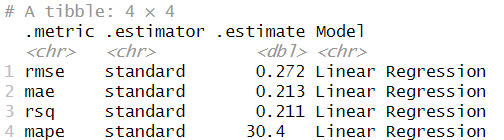

#### 5.2.3 Decision Tree Regressor model

Perform modelling on Decision Tree Regressor model with evaluation metrics set

In [ ]:
# Decision Tree Regressor model
set.seed(456)

# fit the data in decision tree regressor model for training
dt_model <- train(Target ~ ., data = training_set, method = "rpart", metric = "MAE", maximize = FALSE, trControl = mControl)

# evaluate the model
eval_results <- evaluate_model(dt_model, "Decision Tree Regressor", testing_set, test_label)
print(eval_results)

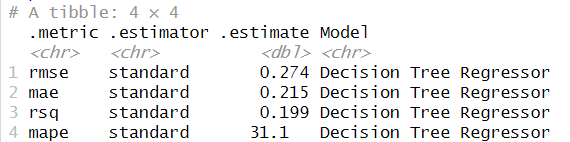

#### 5.2.4 Random Forest Regressor model

Perform modelling on Random Forest Regressor model with evaluation metrics set

In [ ]:
# Random Forest Regressor model
set.seed(456)

# fit the data in random forest regressor model for training
rf_model <- train(Target ~ ., data = training_set, method = "rf", metric = "MAE", maximize = FALSE, trControl = mControl)

# evaluate the model
eval_results <- evaluate_model(rf_model, "Random Forest Regressor", testing_set, test_label)
print(eval_results)

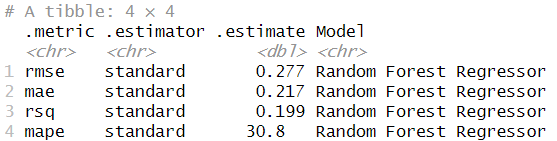

#### 5.2.4 Polynomial Linear Regression model

Perform modelling on Polynomial Linear Regression model with evaluation metrics set

In [ ]:
# Polynomial Linear Regression model
formula <- as.formula("Target ~ poly(encoded_SeatType, degree = 2) + poly(encoded_TypeOfTraveller, degree = 2) + poly(CabinStaffService, degree = 2) + poly(GroundService, degree = 2)")
set.seed(456)

# fit the data in polynomial regression model for training
poly_model <- train(formula, data = training_set, method = "lm", metric = "MAE", maximize = FALSE, trControl = mControl)
eval_results <- evaluate_model(poly_model, "Polynomial Linear Regression", testing_set, test_label)
print(eval_results)

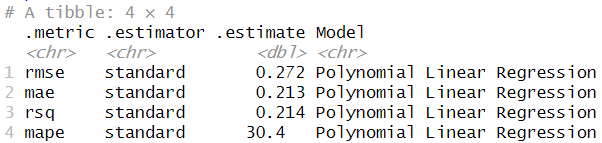

#### 5.2.5 XGBoost Regressor model

Perform modelling on XGBoost Regressor model with evaluation metrics set

In [ ]:
# XGBoost Regressor model

# Define XGBoost model specification
xgb_spec <- boost_tree(
  trees = 100,
  tree_depth = 6,
  min_n = 1,
  loss_reduction = 0,
  sample_size = 1,
  mtry = 1,
  learn_rate = 0.3
) %>%
  set_engine("xgboost") %>%
  set_mode("regression")

# setup the workflow for xgboost
xgb_workflow <- workflow() %>%
  add_model(xgb_spec) %>%
  add_formula(Target ~ .)

# Create cross-validation with 10 folds
set.seed(456)
cv_folds <- vfold_cv(testing_set, v = 10)

# Fit the model
xgb_resamples <- fit_resamples(
  xgb_workflow,
  resamples = cv_folds,
  metrics = metric_set(rmse, mae, rsq, mape),
  control = control_resamples(save_pred = TRUE)
)

# Collect metrics from cross-validation
eval_results <- collect_metrics(xgb_resamples)
eval_results <- eval_results %>%
  mutate(Model = "XGBoost Regressor")
print(eval_results)

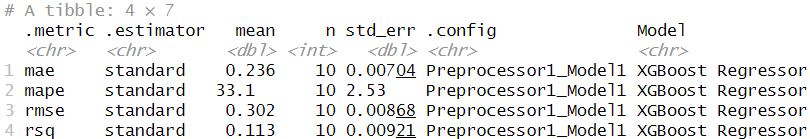


#### 5.2.6 Conclusion on Regression

Overview from the regression models built:

*   RMSE of all models above are evenly identical which concludes that the model's prediction average deviate from the actual values are the similar.

*   MAE of the models are also similar which shows the models prediction error are nearly the same.

*   R-square value is very low which indicates that the model is not capturing the variability in the data.

*   MAPE is too high which shows that the model prediction is not very accurate.

Thus, Polynomial Linear Regression model performs the best out of all the model. But overall models performance are not great and have low accuracy even though cross validation is applied.

## **6. Conclusion & Discussion**

---
* Submission will be an R Markdown published at RPubs
* prepare the presentation (video recording, maximum 12 minutes)
* Implications & Conclusions.
* due on **8-June**

## **Reference**
----
found any websites, guidances that can contribute to this project.

1. https://guides.library.upenn.edu/penntdm/r
2. https://medium.com/@tech-gumptions/natural-language-processing-nlp-pipeline-e766d832a1e5
3. https://towardsdatascience.com/word-embedding-techniques-word2vec-and-tf-idf-explained-c5d02e34d08
4.
